Let's first setup our imports

In [64]:
import pandas as pd
import numpy as np
from sklearn import cluster
from sklearn import metrics
from sklearn.metrics import pairwise_distances
import matplotlib.pyplot as plt
import matplotlib
from matplotlib import pyplot
from sklearn import datasets

## Step 1: Import and format the data

Sklearn already has the Iris dataset built in, so all we have to do is import it!

In [65]:
df = pd.read_csv("/Users/generalassembly/Documents/repo-DC-DSI-3/DC-DSI-3/curriculum/07-week/7.01-intro-to-clustering/assets/datasets/iris.csv")
df.head(5)

,SepalLength,SepalWidth,PetalLength,PetalWidth,Name
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


## unsuppervise

Define the "x" and "y" variables. *Remember*, y is our classifer, and x is our attributes.

In [66]:
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.cluster import KMeans
from sklearn import metrics
import pandas as pd
import numpy as np
%matplotlib inline
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm
from sklearn.preprocessing import normalize


In [67]:
X = df[['SepalLength','SepalWidth','PetalLength','PetalWidth']]
y = df['Name']

## Step 2: Plot the data to estimate clusters

Plot the data using scatterplots - take a look at all the combinations of variables to get a feel for how the data is distributed. 

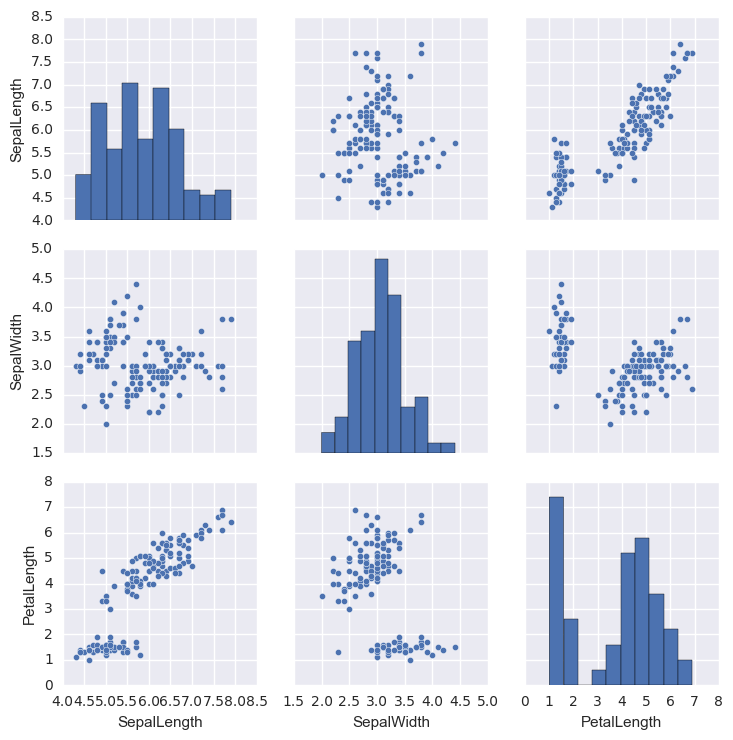

In [68]:
import seaborn as sns
cols = X.columns[:-1]
sns.pairplot(X[cols])

## Step 3: Cluster the data

Run the clustering analysis using scikit-learn.

*Hint*: Estimate the number of clusters, k, based on your visual examination of the distributions.

In [69]:
from sklearn.preprocessing import normalize

nx = normalize(X)

s_kmeans = KMeans(n_clusters = 3)

s_kmeans.fit(nx)

## generate y target

scaled_labels = s_kmeans.labels_



Compute the labels and centroids

In [124]:
#Now we have a target variable/cluster that has been created by our model
from sklearn.cross_validation import train_test_split

X_train, X_test, y_train, y_test = train_test_split(nx, scaled_labels, random_state = 66, test_size = 0.5)

# In my experience random state is highly influential in this model type.
kmeans = KMeans(n_clusters=3,random_state = 26, max_iter = 300)

# Refit a model
kmeans.fit(X_train, y_train)

y_pred_labels = kmeans.predict(X_test)
## Compute the accuracy score using scikit to see how accurate our analysis is
metrics.accuracy_score(y_test, y_pred_labels)


0.37333333333333335

## Check the centroids to see where each cluster is lying
## Check the labels of the clusters


In [112]:
labels = kmeans.labels_
centroids = kmeans.cluster_centers_
inertia = kmeans.inertia_

print labels
print centroids
print inertia

[0 2 0 0 1 0 2 0 1 0 2 0 2 0 2 0 0 2 2 0 2 2 1 0 1 2 1 2 2 2 2 1 0 0 2 2 2
 1 1 0 0 1 1 1 0 1 1 0 0 0 1 1 1 0 2 1 1 0 2 0 1 1 0 2 2 2 0 0 2 0 2 2 0 0
 0]
[[ 0.70579788  0.32875175  0.58719733  0.21633513]
 [ 0.79917303  0.55139289  0.2318754   0.0386923 ]
 [ 0.75598376  0.3473325   0.52926744  0.1609058 ]]
0.151451825912


## Step 4: Evaluate the clusters

First, go ahead and plot the results of your clustering analysis

Plot the clusters

/anaconda/envs/py27/lib/python2.7/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


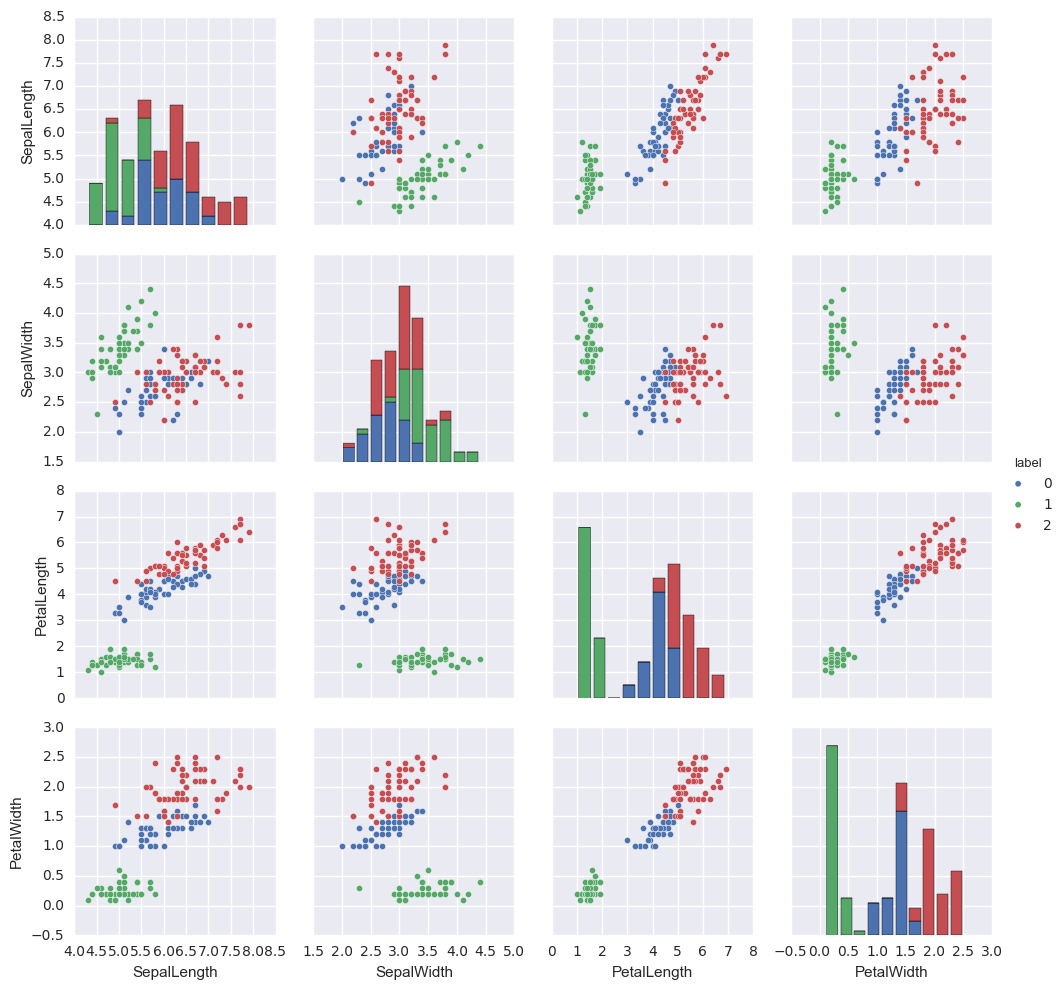

In [91]:
df['label'] =scaled_labels
X['label'] = scaled_labels
cols = X.columns[:-1]
sns.pairplot(X, x_vars=cols, y_vars= cols, hue='label')


Plot the predicted vs actual classifcations to see how our clustering analysis compares

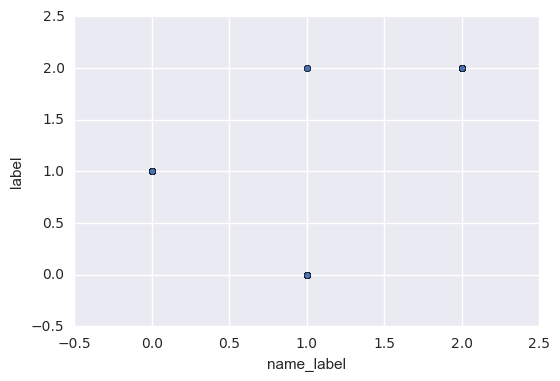

In [82]:
df.columns
from sklearn.preprocessing import LabelEncoder
df['name_label'] = LabelEncoder().fit_transform(df['Name'])
X_ax =df['label']

df.plot.scatter(x='name_label',y='label');

In [55]:
df.head()

,SepalLength,SepalWidth,PetalLength,PetalWidth,Name,label,name_label
0,5.1,3.5,1.4,0.2,Iris-setosa,1,0
1,4.9,3.0,1.4,0.2,Iris-setosa,1,0
2,4.7,3.2,1.3,0.2,Iris-setosa,1,0
3,4.6,3.1,1.5,0.2,Iris-setosa,1,0
4,5.0,3.6,1.4,0.2,Iris-setosa,1,0


In [106]:
X_new = df.drop('Name', 1)

In [107]:
X_new

,SepalLength,SepalWidth,PetalLength,PetalWidth,label,name_label
0,5.1,3.5,1.4,0.2,1,0
1,4.9,3.0,1.4,0.2,1,0
2,4.7,3.2,1.3,0.2,1,0
3,4.6,3.1,1.5,0.2,1,0
4,5.0,3.6,1.4,0.2,1,0
5,5.4,3.9,1.7,0.4,1,0
6,4.6,3.4,1.4,0.3,1,0
7,5.0,3.4,1.5,0.2,1,0
8,4.4,2.9,1.4,0.2,1,0
9,4.9,3.1,1.5,0.1,1,0


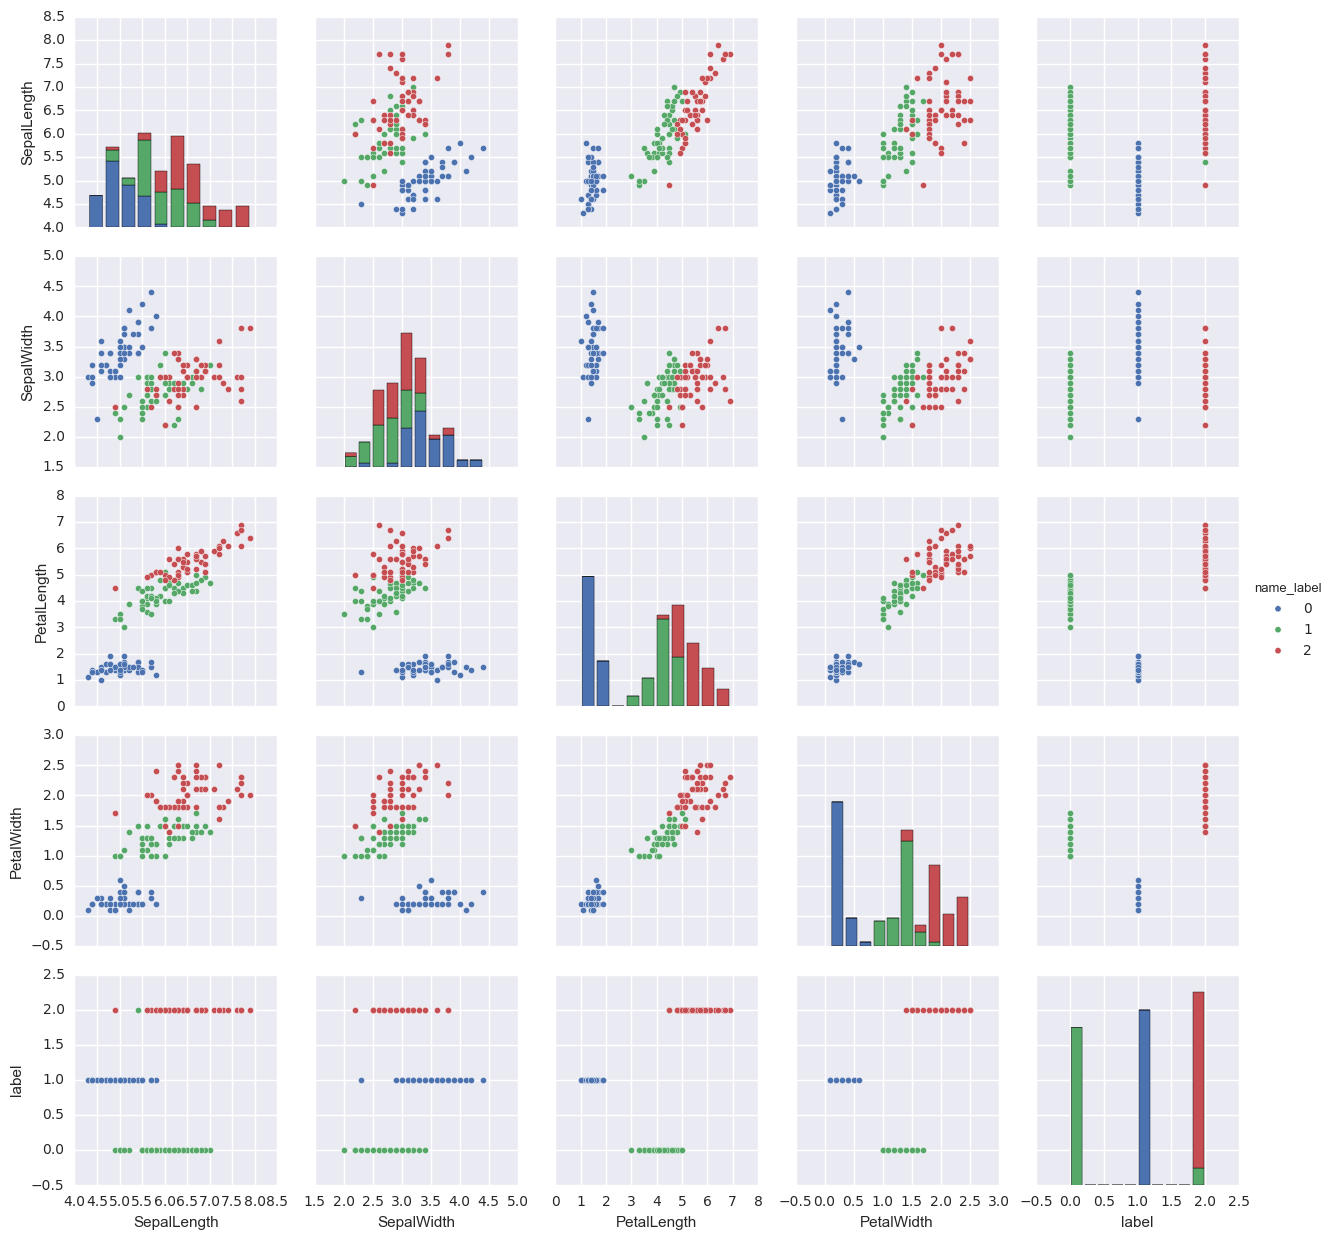

In [108]:
cols = X_new.columns[:-1]
sns.pairplot(X_new, x_vars=cols, y_vars= cols, hue='name_label')

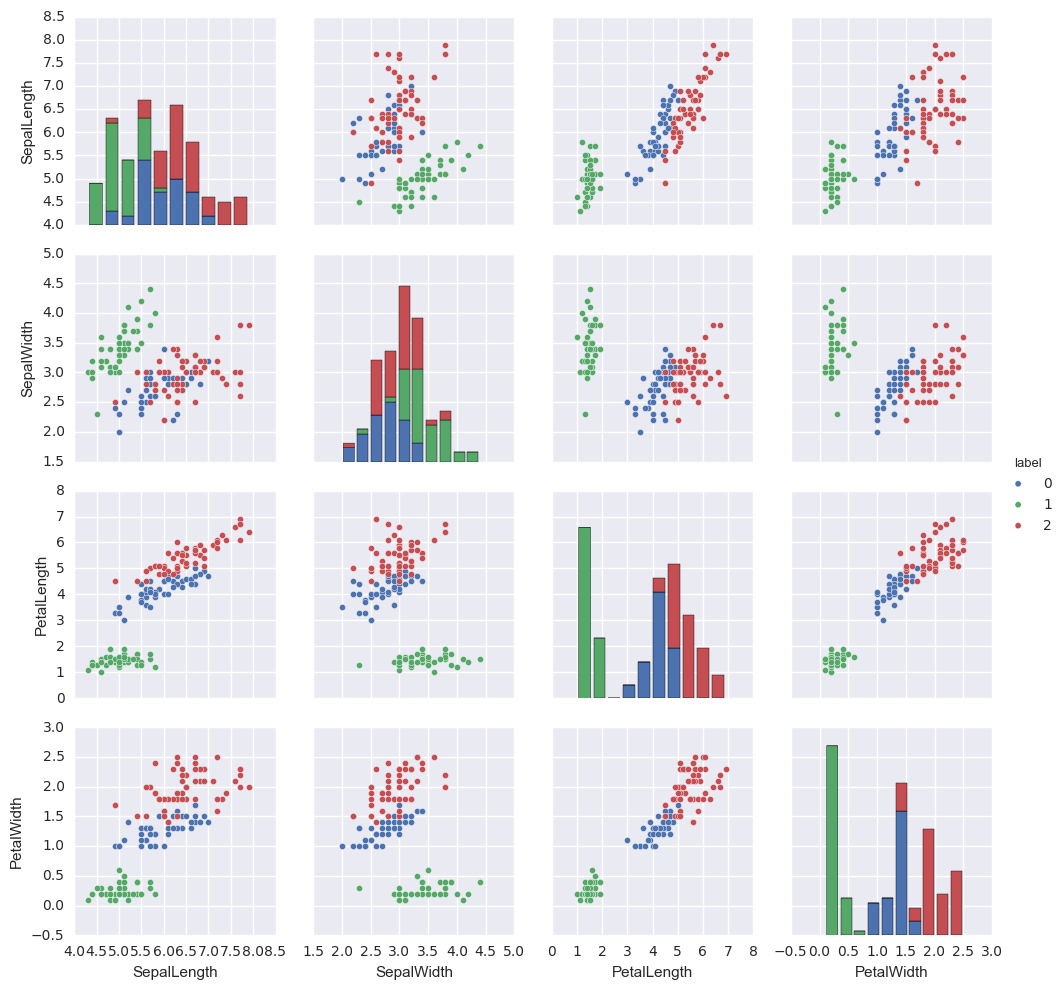

In [109]:
cols = X.columns[:-1]
sns.pairplot(X, x_vars=cols, y_vars= cols, hue='label')

Compute the silhoutte coefficient to see how consistent our data is within the clusters

In [113]:
from sklearn.metrics import silhouette_score
silhouette_score(X_test, labels ,metric='euclidean')

-0.074977950352816736

Calculate the Precision, Recall, and F - Score to see the test's accuracy

In [114]:
print metrics.classification_report(y_test, y_pred_labels)

             precision    recall  f1-score   support

          0       0.00      0.00      0.00        20
          1       1.00      1.00      1.00        30
          2       0.00      0.00      0.00        25

avg / total       0.40      0.40      0.40        75



Compute the Confusion Matrix to test the performance of the clustering analysis

In [127]:
print(metrics.confusion_matrix(y_test, y_pred_labels))

[[ 0  0 18]
 [ 0 28  0]
 [29  0  0]]


Compute homogeneity, completeness and v_measure test.

In [126]:
from sklearn.metrics import completeness_score
print completeness_score(y_test,y_pred_labels)

1.0


In [125]:
from sklearn.metrics import homogeneity_score
print homogeneity_score(y_test,y_pred_labels)

1.0
